# Pre-Processing and Training Data

Process:

-Creat dummy features

-Scale standardization

-Split data into training and testing subsets

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import scipy
import pandas.util.testing as tm

In [5]:
nba = pd.read_excel(r'C:\Users\ptlon\nba.xlsx')

In [6]:
nba

,Unnamed: 0,Season,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,...,ORtg_y,DRtg_y,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,140.0,110.0,0.0,0.0,0.0,0.291,6.3,-10.5,-4.1,0.0
1,1,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,204.0,112.0,0.0,0.0,0.0,0.343,9.7,-6.6,3.2,0.0
2,2,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,125.0,103.0,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
3,3,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,122.0,104.0,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4
4,4,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,130.0,96.0,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85465,85465,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,...,110.0,111.0,3.9,1.8,5.8,0.088,1.5,-0.4,1.1,2.5
85466,85466,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,...,101.0,111.0,0.2,0.4,0.6,0.038,-1.6,1.2,-0.4,0.3
85467,85467,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,...,107.0,114.0,2.3,0.4,2.8,0.065,0.5,-3.5,-3.0,-0.5
85468,85468,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,...,106.0,106.0,1.1,1.8,2.9,0.088,-1.6,0.3,-1.3,0.3


In [7]:
sns.set_style(style = 'whitegrid')

In [8]:
nrow, ncol = nba.shape
nrow, ncol

(85470, 45)

In [9]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85470 entries, 0 to 85469
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  85470 non-null  int64  
 1   Season      85470 non-null  int64  
 2   Team        85470 non-null  object 
 3   W           85470 non-null  int64  
 4   L           85470 non-null  int64  
 5   W/L%        85470 non-null  float64
 6   Finish      85470 non-null  int64  
 7   SRS         85470 non-null  float64
 8   Pace        85470 non-null  float64
 9   Rel_Pace    85470 non-null  float64
 10  ORtg_x      85470 non-null  float64
 11  Rel_ORtg    85470 non-null  float64
 12  DRtg_x      85470 non-null  float64
 13  Rel_DRtg    85470 non-null  float64
 14  Playoffs    85470 non-null  int64  
 15  Coaches     85470 non-null  object 
 16  Top WS      85470 non-null  object 
 17  Player      85470 non-null  object 
 18  Age         85470 non-null  int64  
 19  Tm          85470 non-nul

In [10]:
df = nba[['W/L%', 'Pace']]

In [11]:
df.head()

,W/L%,Pace
0,58.5,97.1
1,58.5,97.1
2,58.5,97.1
3,58.5,97.1
4,58.5,97.1


Split the dataset into Independent(X) and Dependent(y) Variables


In [12]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

In [13]:
 x

array([[58.5],
       [58.5],
       [58.5],
       ...,
       [28. ],
       [28. ],
       [28. ]])

In [14]:
y

array([97.1, 97.1, 97.1, ..., 93.8, 93.8, 93.8])

Divide the complete dataset into training and testing data


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


Implement Classifier based on Simple Linear Regression


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = model.predict(X_test)
predictions

array([92.9964004 , 93.08737111, 93.21642259, ..., 92.95831963,
       93.35816767, 93.04823255])

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

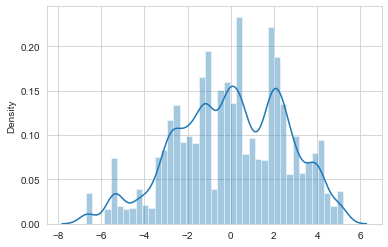

In [18]:
sns.distplot(predictions-y_test)

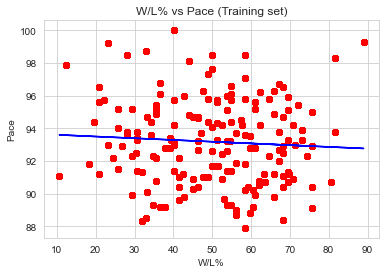

In [19]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('W/L% vs Pace (Training set)')
plt.xlabel('W/L%')
plt.ylabel('Pace')
plt.show()

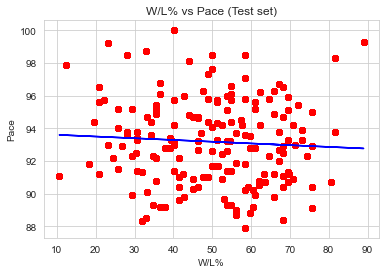

In [20]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('W/L% vs Pace (Test set)')
plt.xlabel('W/L%')
plt.ylabel('Pace')
plt.show()

Standardize the magnitude of numeric features using a scaler


In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
Xs = sc_X.fit_transform(X_test)
Ys = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [22]:
models = LinearRegression()
models.fit(Xs, Ys)

LinearRegression()

In [23]:
predictionss = models.predict(Xs)
predictionss

array([-0.07488789, -0.03763863,  0.01520334, ..., -0.0904806 ,
        0.07324288, -0.05366448])

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

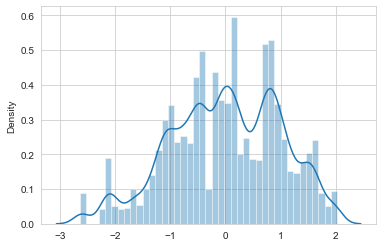

In [24]:
sns.distplot(predictionss-Ys)

In [25]:
df = nba[['Playoffs', '3PAr']]

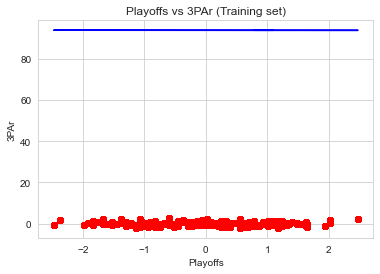

In [26]:
plt.scatter(Xs, Ys, color = 'red')
plt.plot(Xs, model.predict(Xs), color = 'blue')
plt.title('Playoffs vs 3PAr (Training set)')
plt.xlabel('Playoffs')
plt.ylabel('3PAr')
plt.show()

Convert Categorical data into dummy or indicator variables

In [28]:
VORP_dummies = pd.get_dummies(nba.VORP, prefix='VORP') 
nba = pd.concat([nba, VORP_dummies], axis = 1)

In [32]:
Player_dummies = pd.get_dummies(nba.Player, prefix='Player') 
nba = pd.concat([nba, Player_dummies], axis = 1)
nba.head()

,Unnamed: 0,Season,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,...,Player_Xavier Munford,Player_Xavier Silas,Player_Yao Ming,Player_Yi Jianlian,Player_Zabian Dowdell,Player_Zach LaVine,Player_Zach Randolph,Player_Zaza Pachulia,Player_Zoran Dragic,Player_Zydrunas Ilgauskas
0,0,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,0,0,0,0,0,0,0,0,0,0
1,1,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,0,0,0,0,0,0,0,0,0,0
2,2,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,0,0,0,0,0,0,0,0,0,0
3,3,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,0,0,0,0,0,0,0,0,0,0
4,4,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,...,0,0,0,0,0,0,0,0,0,0


In [33]:
dataset_new = nba.select_dtypes(include=['int', 'float'])
dataset_new.head()

,Unnamed: 0,Season,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg_x,...,ORtg_y,DRtg_y,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,140.0,110.0,0.0,0.0,0.0,0.291,6.3,-10.5,-4.1,0.0
1,1,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,204.0,112.0,0.0,0.0,0.0,0.343,9.7,-6.6,3.2,0.0
2,2,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,125.0,103.0,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
3,3,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,122.0,104.0,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4
4,4,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,130.0,96.0,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7


In [36]:
dataset_new.to_csv("salary_dummies.csv")

In [37]:
dataset_new

,Unnamed: 0,Season,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg_x,...,ORtg_y,DRtg_y,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,140.0,110.0,0.0,0.0,0.0,0.291,6.3,-10.5,-4.1,0.0
1,1,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,204.0,112.0,0.0,0.0,0.0,0.343,9.7,-6.6,3.2,0.0
2,2,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,125.0,103.0,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
3,3,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,122.0,104.0,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4
4,4,2015,48,34,58.5,2,3.49,97.1,1.3,105.1,...,130.0,96.0,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85465,85465,2010,23,59,28.0,5,-7.30,93.8,1.7,102.4,...,110.0,111.0,3.9,1.8,5.8,0.088,1.5,-0.4,1.1,2.5
85466,85466,2010,23,59,28.0,5,-7.30,93.8,1.7,102.4,...,101.0,111.0,0.2,0.4,0.6,0.038,-1.6,1.2,-0.4,0.3
85467,85467,2010,23,59,28.0,5,-7.30,93.8,1.7,102.4,...,107.0,114.0,2.3,0.4,2.8,0.065,0.5,-3.5,-3.0,-0.5
85468,85468,2010,23,59,28.0,5,-7.30,93.8,1.7,102.4,...,106.0,106.0,1.1,1.8,2.9,0.088,-1.6,0.3,-1.3,0.3
